# <span style="color:#8B0000;font-family:Papirus">Algoritmos de búsqueda</span>

Supongamos que vamos a hacer una búsqueda en un grafo visitando sus vértices. Ya hemos visto que es conveniente usar árboles, así que los usaremos como herramienta principal. Vamos a distinguir dos estrategias principales de búsqueda: **en profundidad** (BEP), y **en anchura** (BEA). En profundidad, significa: a partir de un vértice ir a un vértice vecino (si es posible) y de ahí a otro vecino del actual, etc. En anchura significa: a partir de un vértice $v$, buscar entre sus vecinos, luego buscar entre los vecinos de un vecino de $v$, etc. 

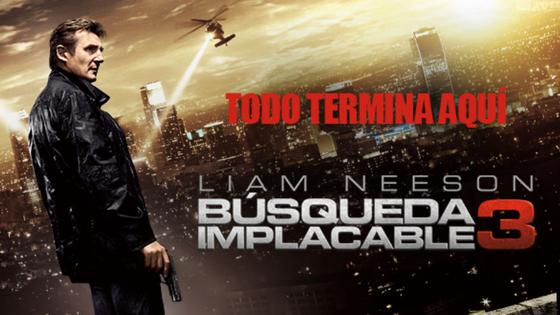

## <span style="color:#8B0000;font-family:Papirus">Búsqueda en profundidad</span>

Para hacer una BEP en un grafo $G$, comenzamos con un vértice $v$ y construimos un árbol $T$ así:

1. El **vértice activo** $x$ es $v$.
2. Si $x$ tiene un vecino (no usado ya) $y$, agrega $xy$ al árbol y ahora $x$ será $y$.
3. Si $x$ tiene un vecino (no usado ya) $z$, agrega $xz$ al árbol y ahora $x$ será $z$.
4. En caso contrario, $x$ será $y$ y vuelve al paso 3.
5. La búsqueda termina cuando $x$ sea $v$ de nuevo y no haya más vecinos de $x$.

Por construcción, $T$ es un árbol. ¿Qué podemos decir sobre los vértices que se visitan con este algoritmo? Supongamos que $z$ es un vértice en la misma componente de $G$ que $v$.

1. Sea $v_0 = v$, $v_1$, $\dots$, $v_k = z$ un camino en $G$.
2. Si $z\not\in V(T)$, hay un $i$ tal que $v_i\in V(T)$ y $v_{i + 1}\not\in V(T)$.
3. $v_i$ es $x$ al menos una vez.
4. Cada vez que vayamos de $v_i$ a otro vértice, hay que volver a $v_i$ y revisar si tiene otro vecino.
5. Sólo abandonamos $v_i$ si se han visitado todos sus vecinos.
6. Como $v_{i + 1}$ no está en $T$, no es vecino de $v_i$. Contradicción.
7. $z$ **tiene que estar** en $T$.

> <span style="color:#8B0000;font-family:Papirus">**Teorema:**</span> Sean $G$ un grafo, $v\in V(G)$ y $T$ obtenido mediante BEP a partir de $v$. Entonces $T$ contiene todos los vértices de la componente de $G$ que contiene a $v$.

In [76]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

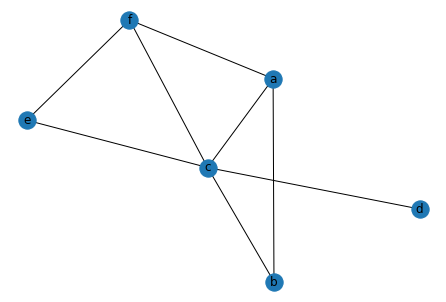

In [77]:
G = nx.Graph({'a': ['b', 'c', 'f'], 'b': ['c'], 'c': ['d', 'e', 'f'], 'e': ['f']})
nx.draw(G, with_labels=True)

In [78]:
def bep(g, v):
    t = nx.Graph()
    pila = [v]
    t.add_node(v)
    while pila != []:
        activo = pila[-1]
        print(activo)
        bolsa = [u for u in list(g.neighbors(activo)) if u not in list(t.nodes())] 
        if bolsa != []:
            y = bolsa[0]
            t.add_edge(activo, y)
            pila.append(y)
        else:
            del(pila[-1])
    return t

a
b
c
d
c
e
f
e
c
b
a


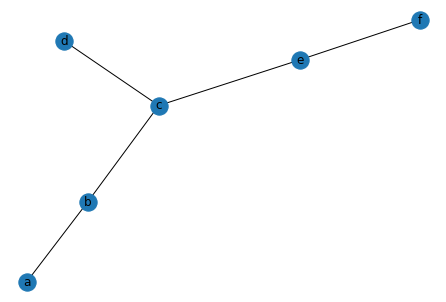

In [79]:
nx.draw(bep(G, 'a'), with_labels=True)

b
a
c
d
c
e
f
e
c
a
b


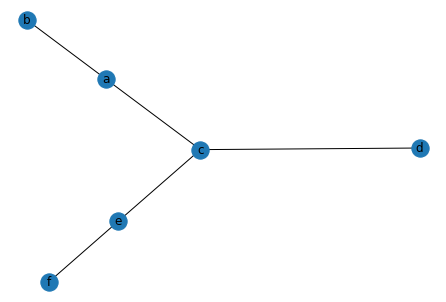

In [80]:
nx.draw(bep(G, 'b'), with_labels=True)

5
0
1
2
3
4
9
6
8
6
9
7
9
4
3
2
1
0
5


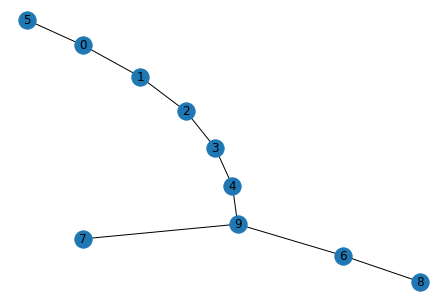

In [81]:
P = nx.petersen_graph()
nx.draw(bep(P, 5), with_labels=True)

## <span style="color:#8B0000;font-family:Papirus">Búsqueda en anchura</span>

Para hacer una BEA en un grafo $G$, ordena los vértices en una lista y comienza con el primero, digamos $v$, para construir un árbol $T$ así:

1. El **vértice activo** $x$ es $v$.
2. Mientras que $x$ tenga un vecino $y$, agrega $xy$ al árbol.
3. Ahora $x$ es el siguiente vértice de $G$.
4. Vuelve al paso 2.
5. El proceso termina cuando se acaben los vértices de la lista.

Así como para la BEP, la BEA produce el árbol como queremos:

> <span style="color:#8B0000;font-family:Papirus">**Teorema:**</span> Sean $G$ un grafo, $v\in V(G)$ y $T$ obtenido mediante BEA a partir de $v$. Entonces $T$ contiene todos los vértices de la componente de $G$ que contiene a $v$.

In [82]:
def bea(g, v):
    t = nx.Graph()
    cola = [v]
    t.add_node(v)
    while cola != []:
        activo = cola[0]
        bolsa = [u for u in list(g.neighbors(activo)) if u not in list(t.nodes())] 
        if bolsa != []:
            y = bolsa[0]
            t.add_edge(activo, y)
            cola.append(y)
        else:
            del(cola[0])
            print(activo)
    return t

a
b
c
f
d
e


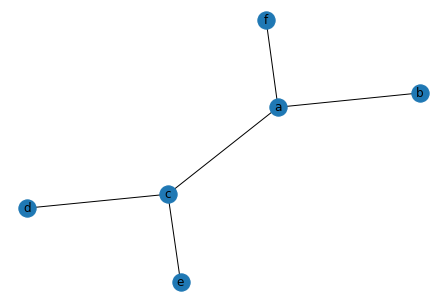

In [84]:
nx.draw(bea(G, 'a'), with_labels=True)

b
a
c
f
d
e


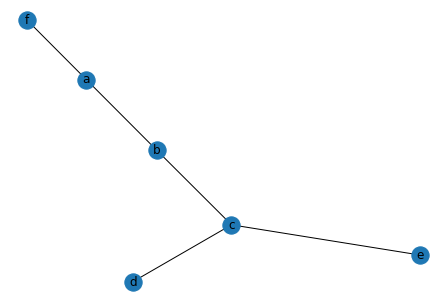

In [85]:
nx.draw(bea(G, 'b'), with_labels=True)

c
a
b
d
e
f


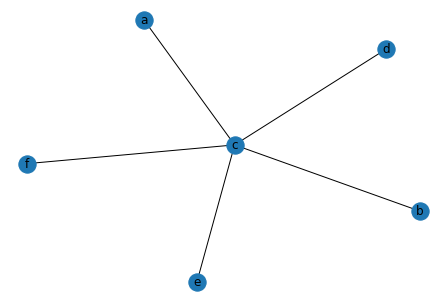

In [86]:
nx.draw(bea(G, 'c'), with_labels=True)

0
1
4
5
2
6
3
9
7
8


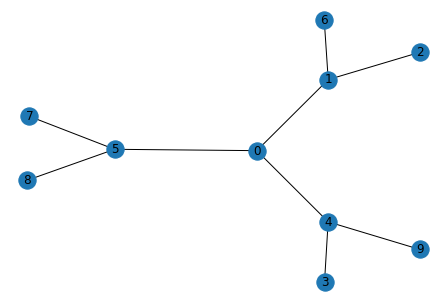

In [87]:
nx.draw(bea(P, 0), with_labels=True)